In [1]:
# importing necessary modules and packeges

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
# fetching data files for processing data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
# Obesrving taining data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
# Observing testing data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# getting shape of training data
train.shape

(891, 12)

In [7]:
# getting shape of testing data
test.shape

(418, 11)

In [8]:
# Describing training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Describing testing data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# checking info of training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# checking info of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# checking null values from training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

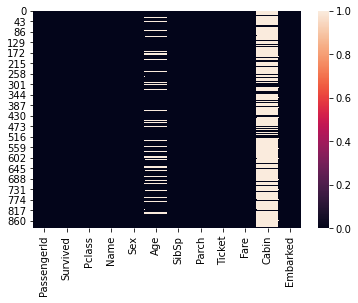

In [13]:
# drawing heatmap diagram for null values from training dataset
sns.heatmap(train.isnull())

In [14]:
# checking null values fron testing data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

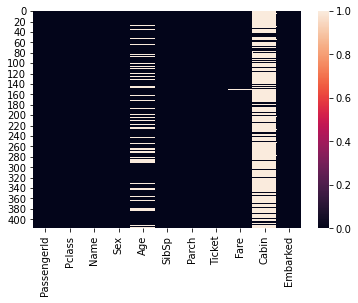

In [15]:
# drawing heatmap diagram for null values from testing dataset
sns.heatmap(test.isnull())

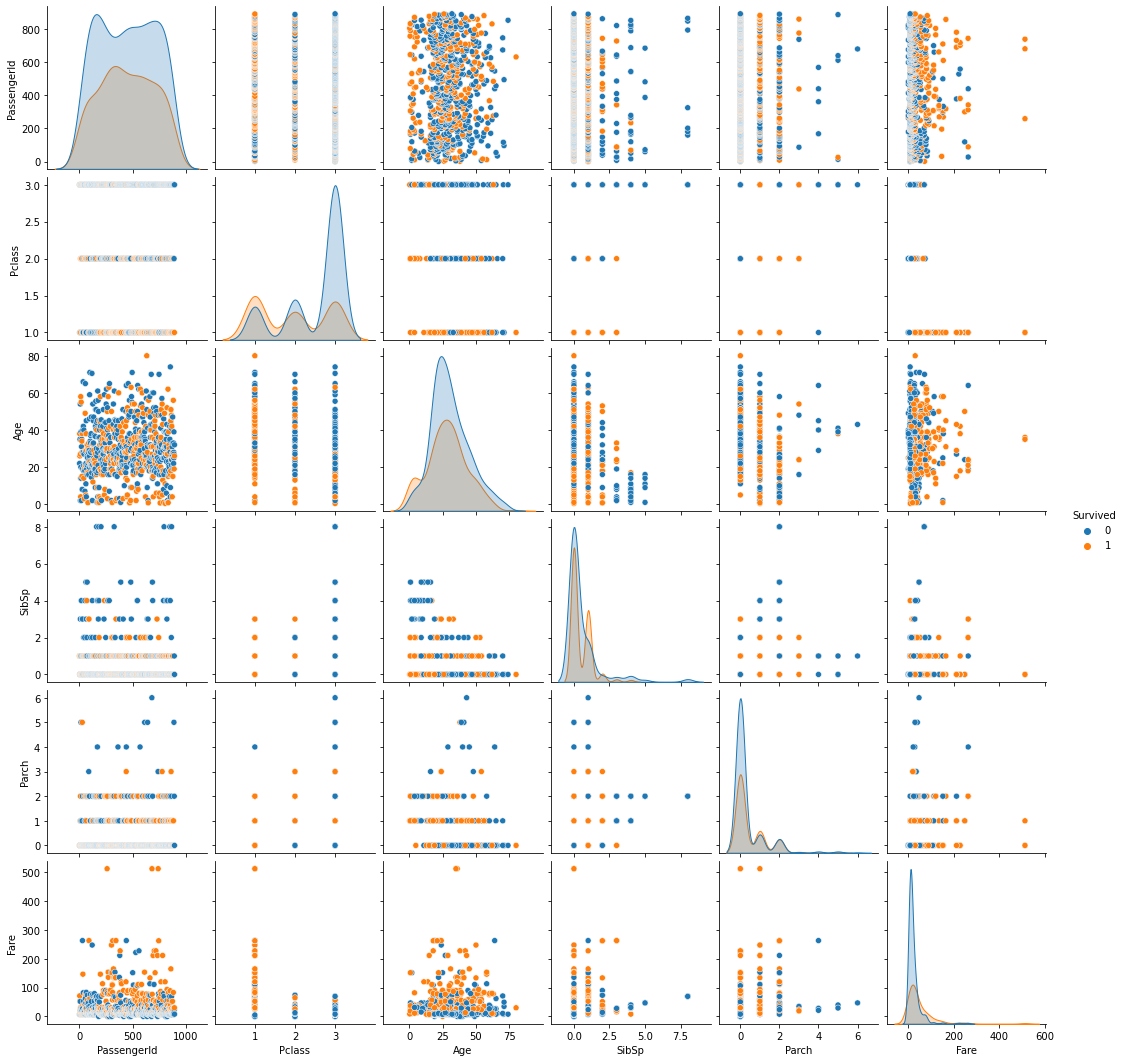

In [16]:
# observing relationship between features and labels of training dataset
sns.pairplot(train,hue='Survived')

D:\softwares\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

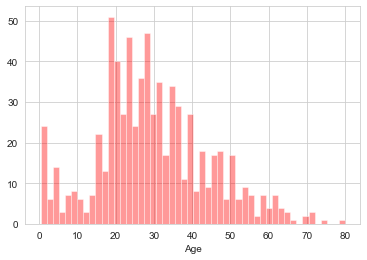

In [17]:
# checking distribution of 'Age coloumn of train dataset'
sns.set_style(style='whitegrid')
sns.distplot(train['Age'],bins=50,kde=False,hist=True,color='red')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

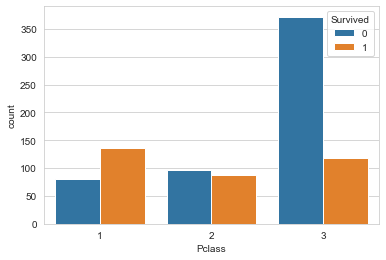

In [18]:
# drawing graph which showing relationship between 'Pclass' and 'Survived'
sns.set_style(style='whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train,)

<AxesSubplot:xlabel='Sex', ylabel='count'>

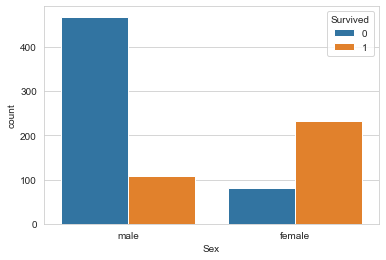

In [19]:
# drawing graph which showing relationship between 'Sex' and 'Survived'
sns.set_style(style='whitegrid')
sns.countplot(x='Sex',hue='Survived',data=train,)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

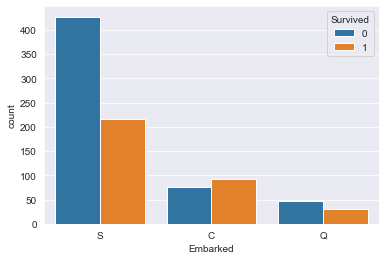

In [20]:
# drawing graph which showing relationship between 'Embarked' and 'Survived'
sns.set_style(style='darkgrid')
sns.countplot(x='Embarked',hue='Survived',data=train,)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

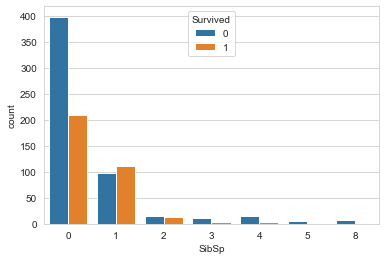

In [21]:
# drawing graph which showing relationship between 'SibSp' and 'Survived'
sns.set_style(style='whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=train)

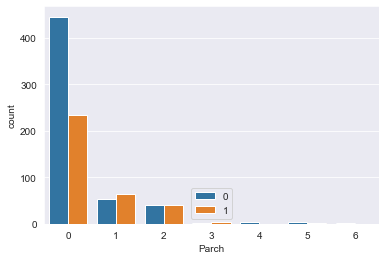

In [22]:
# drawing graph which showing relationship between 'Parch' and 'Survived'
sns.set_style(style='darkgrid')
sns.countplot(x='Parch',hue='Survived',data=train)
plt.legend(loc=0)

<AxesSubplot:xlabel='Age', ylabel='count'>

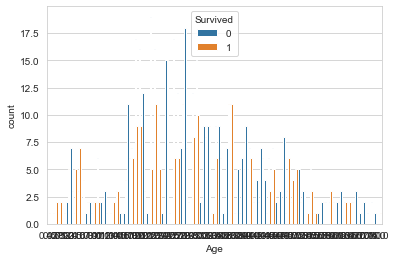

In [23]:
# drawing graph which showing relationship between 'Age' and 'Survived'
sns.set_style(style='whitegrid')
sns.countplot(x='Age',hue='Survived',data=train)

In [24]:
#Combining both train and test dataset into 'train_test_data'
train_test_data=[train,test]

In [25]:
# checking new dataset train_test_data 
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [26]:
# extracting title from train_test_data into new colomn 'title'
for dataset in train_test_data:
    dataset['title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False )

In [27]:
# obsrving new colomn in train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [29]:
# counting how many differnt type of title are their in 'title' colomn
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Capt          1
Sir           1
Mme           1
Don           1
Countess      1
Jonkheer      1
Ms            1
Name: title, dtype: int64

In [30]:
#creating new dictionary of name title_num of title name for mapping into 'title' 
title_num={'Miss':1,'Mrs':2,'Mr':0,'Master':3,'Dr':3,'Mlle':3,'Major':3,'Col':3,'Countess':3,'Sir':3,'Mme':3,'Lady':3,'Ms':3,'Rev':3,'Capt':3,'Don':3,'Jonkheer':3}
for dataset in train_test_data:
    dataset['title']=dataset['title'].map(title_num)

In [31]:
# looking train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [33]:
# mapping 'sex_num' dictionary into 'Sex' colomn
sex_num={'male':1,'female':0}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_num)

In [34]:
# looking traing dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2.0


<AxesSubplot:xlabel='Sex', ylabel='Age'>

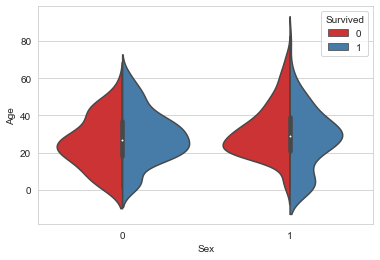

In [36]:
# plotting violinplot for showing relation between 'Sex' and 'Age' in terms of Survived
sns.violinplot(x="Sex", y="Age", data=train,hue='Survived',split=True,palette='Set1')

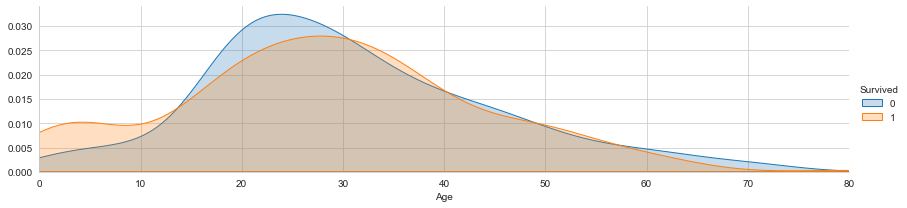

In [37]:
#FacetGraph showing relation between "Survived" and "Age"
sns.set_style(style='whitegrid')
g=sns.FacetGrid(train,hue='Survived',aspect=4)
g.map(sns.kdeplot,'Age',shade=True )
g.set(xlim=(0,train['Age'].max()))
g.add_legend()

In [38]:
# filling empty values from "Age" colomn of both train and test data with medium value
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('title')['Age'].transform('median'),inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            1
dtype: int64

In [43]:
# counting different values from "Fare" colomn
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [44]:
# filling empty "Fare" values in test dataset
test['Fare'].fillna(test.groupby('Pclass')['Age'].transform('median'),inplace=True)

In [45]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            1
dtype: int64

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2.0


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

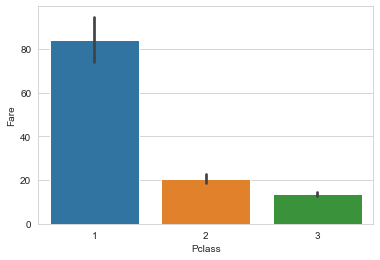

In [47]:
# plotting bargraph between  "Pclass" and "Fare"
sns.barplot(x='Pclass',y='Fare',data=train)

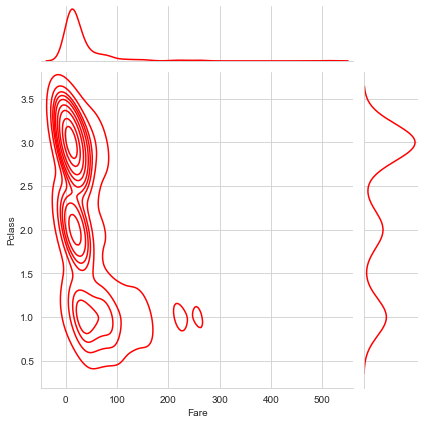

In [48]:
#plotting graph between "Fare" and "Pclass"
sns.jointplot(x='Fare',y='Pclass',data=train,color='red',kind='kde')

In [49]:
# creating new values for set of particular group of Fare 
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17,'Fare']=0
    dataset.loc[dataset['Fare'] > 17 & (dataset['Fare'] <= 30),'Fare']=1
    dataset.loc[dataset['Fare'] >30  & (dataset['Fare'] <= 100),'Fare']=2
    dataset.loc[dataset['Fare'] > 100,'Fare']=3

In [50]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2.0,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,S,0


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,0.0,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,0.0,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,0.0,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,0.0,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,0.0,NaN,S,2.0


In [52]:
# counting differenr type of location from 'Embarked' colomn
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
# filling empty rows of colomn 'Embarked'  
train['Embarked'].fillna(value='S',inplace=True)

In [54]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
dtype: int64

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            1
dtype: int64

In [56]:
# counting differenr type of title from 'title' colomn
test['title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: title, dtype: int64

In [57]:
#filling empty rows of colomn 'title' 
test['title'].fillna(value=0.0,inplace=True)

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            0
dtype: int64

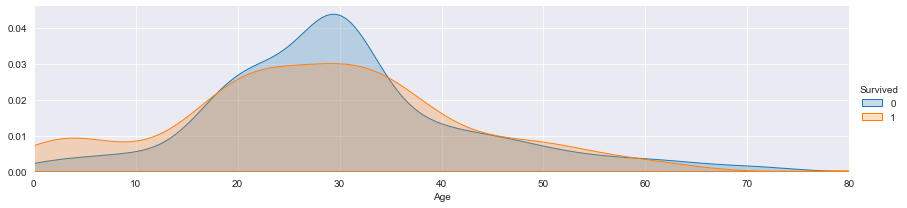

In [59]:
#FacetGraph showing relation between "Survived" and "Age"
sns.set_style(style='darkgrid')
g=sns.FacetGrid(train,hue='Survived',aspect=4)
g.map(sns.kdeplot,'Age',shade=True )
g.set(xlim=(0,train['Age'].max()))
g.add_legend()

In [60]:
train.head()
train["Age"].max()

80.0

In [61]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2.0,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,S,0


In [62]:



for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 20,'Age']=0
    dataset.loc[dataset['Age'] > 20 & (dataset['Age'] <= 40),'Age']=1
    dataset.loc[dataset['Age'] >40  & (dataset['Age'] <= 60),'Age']=2
    dataset.loc[dataset['Age'] > 60,'Age']=3

In [63]:
train.head()     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,2.0,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,NaN,S,0


In [64]:
# combining 'SibSp' and 'Parch' colomn into one colomn 'Familysize'
for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,2.0,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,2.0,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,NaN,S,0,1


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0.0,NaN,Q,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0.0,NaN,S,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",1,2.0,0,0,240276,0.0,NaN,Q,0.0,1
3,895,3,"Wirz, Mr. Albert",1,2.0,0,0,315154,0.0,NaN,S,0.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2.0,1,1,3101298,0.0,NaN,S,2.0,3


In [67]:
# creating dummy variables for 'Embarked' colomn
New_Embarked={'S':0,'Q':1,'C':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(New_Embarked)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,2.0,C85,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,2.0,C123,0,2,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.0,NaN,0,0,1


In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0.0,NaN,1,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0.0,NaN,0,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",1,2.0,0,0,240276,0.0,NaN,1,0.0,1
3,895,3,"Wirz, Mr. Albert",1,2.0,0,0,315154,0.0,NaN,0,0.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2.0,1,1,3101298,0.0,NaN,0,2.0,3


In [70]:
# deleting unnecessary colomn from training and testing data
for dataset in train_test_data:
    dataset.drop(['Name','SibSp','Parch','Ticket','Cabin'],inplace=True,axis=1)

In [71]:
# deleting 'PassengerId' colomn from training data
train.drop('PassengerId',axis=1,inplace=True)

In [72]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'title',
       'FamilySize'],
      dtype='object')

In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,FamilySize
0,892,3,1,2.0,0.0,1,0.0,1
1,893,3,0,2.0,0.0,0,2.0,2
2,894,2,1,2.0,0.0,1,0.0,1
3,895,3,1,2.0,0.0,0,0.0,1
4,896,3,0,2.0,0.0,0,2.0,3


In [74]:
# checking null values remain or not
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   title        418 non-null    float64
 7   FamilySize   418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


<AxesSubplot:>

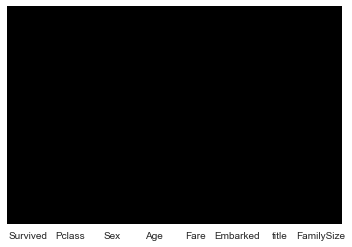

In [76]:
# plotting heatmap of null values from training dataset
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='gist_earth')

<AxesSubplot:>

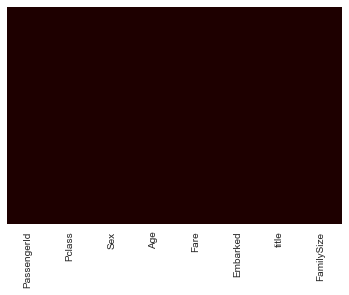

In [77]:
# plotting heatmap of null values from testing dataset
sns.heatmap(test.isnull(),cbar=False,yticklabels=False,cmap='pink')

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

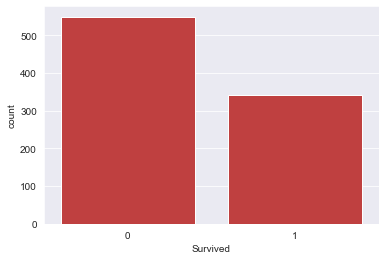

In [79]:
# plotting count plot of SURVIVED value
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,color='red',saturation=0.5)

In [80]:
# assigning features colomn to X by droping 'Survived' colomn for training data
X=train.drop('Survived',axis=1)

In [81]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,title,FamilySize
0,3,1,2.0,0.0,0,0,2
1,1,0,2.0,2.0,2,2,2
2,3,0,2.0,0.0,0,1,1
3,1,0,2.0,2.0,0,2,2
4,3,1,2.0,0.0,0,0,1


In [82]:
# Assigning target colomn
y=train['Survived']

In [83]:
# training module 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [84]:
# checking length of training data
len(x_train)

712

In [85]:
# checking length of testing data
len(x_test)

179

In [86]:
y_train.head()

135    0
384    0
304    0
456    0
75     0
Name: Survived, dtype: int64

In [87]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,title,FamilySize
135,2,1,2.0,0.0,2,0,1
384,3,1,2.0,0.0,0,0,1
304,3,1,2.0,0.0,0,0,1
456,1,1,2.0,2.0,0,0,1
75,3,1,2.0,0.0,0,0,1


In [88]:
# creting varible of 'LogisticRegression' algorithm
model=LogisticRegression()

In [89]:
train.loc[721]

Survived      0.0
Pclass        3.0
Sex           1.0
Age           0.0
Fare          0.0
Embarked      0.0
title         0.0
FamilySize    2.0
Name: 721, dtype: float64

In [90]:
# Fitting features and labels into the algorithm
model.fit(x_train,y_train)

LogisticRegression()

In [91]:
model.score(x_test,y_test)

0.8212290502793296

In [92]:
x_train.iloc[0,:]

Pclass        2.0
Sex           1.0
Age           2.0
Fare          0.0
Embarked      2.0
title         0.0
FamilySize    1.0
Name: 135, dtype: float64

In [93]:

# predecting training model
pred=model.predict([x_train.iloc[3,:]])
pred

array([0], dtype=int64)

In [94]:
y_pred=model.predict(x_test)

In [95]:
# importing module for checking accuracy
from sklearn.metrics import classification_report,r2_score,recall_score,precision_score,confusion_matrix

In [96]:
# printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       123
           1       0.71      0.73      0.72        56

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.82      0.82      0.82       179



In [97]:
# printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[106  17]
 [ 15  41]]


In [98]:
# cretaing varible of 'LinerRegression' algorithm
model1=LinearRegression()

In [99]:
# fitting features and labels inti model
model1.fit(X,y)

LinearRegression()

In [100]:
#predecting result
pred=model1.predict(x_test)

In [101]:
model1.predict([x_train.iloc[0,:]])

array([0.2542468])

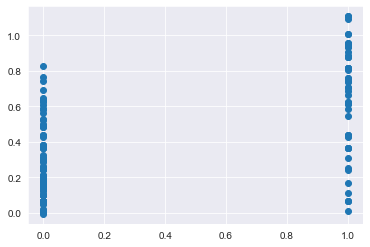

In [102]:
# plottong scatter plot between perdiction and y_test
plt.scatter(y_test,pred)

In [103]:
# calculating value of k for using KNeighboursClassifier algorithm
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

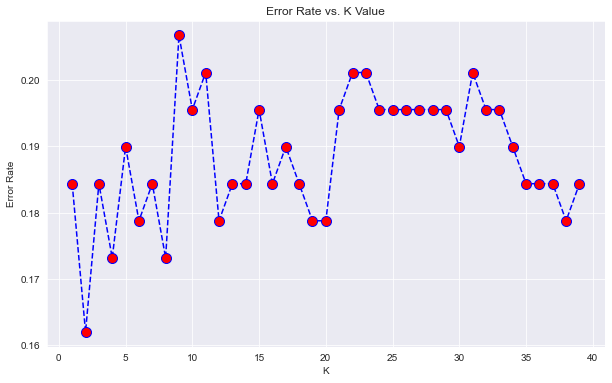

In [104]:
# plotting graph ok k values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[107  16]
 [ 18  38]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       123
           1       0.70      0.68      0.69        56

    accuracy                           0.81       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



In [106]:
# importing module
from sklearn.model_selection import KFold
from sklearn .model_selection import cross_val_score

In [107]:
# checking accuracy of KNeighboursClassifier alorithm
model3=KNeighborsClassifier()
scoring='accuracy'
score=cross_val_score(model3,X,y,cv=10,n_jobs=10,scoring=scoring)
print(np.mean(score)*100)

80.69912609238452


In [108]:
# checking accuracy of DecisionTreeClassifier alorithm
model4=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(model4,X,y,cv=10,n_jobs=10,scoring=scoring)
print(np.mean(score)*100)

80.3645443196005


In [109]:


# checking accuracy of RandomForestClassifier alorithm
model5=RandomForestClassifier()
scoring='accuracy'
score=cross_val_score(model5,X,y,cv=10,n_jobs=10,scoring=scoring)
print(np.mean(score)*100)

80.47440699126092


In [110]:
# checking accuracy of GaussianNB alorithm
model6=GaussianNB()
scoring='accuracy'
score=cross_val_score(model6,X,y,cv=10,n_jobs=10,scoring=scoring)
print(np.mean(score)*100)

79.91385767790263


In [111]:




# checking accuracy of SVC alorithm
model7=SVC()
scoring='accuracy'
score=cross_val_score(model7,X,y,cv=10,n_jobs=10,scoring=scoring)
print(np.mean(score)*100)

83.27840199750312


In [112]:
# by checking accuracy of differnt type of algorithm we got SVC algorithm having more accuracy than any other algorithm
# therefor we are going to use SVC algorithm for training ,testing our data and predicting result 
model8=SVC()
model8.fit(X,y)
test_data=test.drop('PassengerId',axis=1).copy()
pred=model8.predict(test_data)


In [113]:
model8.predict([x_train.iloc[3,:]])

array([0], dtype=int64)

In [114]:
model8.score(x_test,y_test)

0.8435754189944135

In [115]:
# Creting dataframe from 'PassengerId and prediction of Survived'
final=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})

In [116]:
final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [117]:
# convering dataframe/ Saving to 'Titanic_project_Solution.csv' file
final.to_csv('Titanic_project_solution.csv',index=False)

In [118]:
# reading file
sol=pd.read_csv('Titanic_project_solution.csv')

In [119]:
sol.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [120]:
 import pickle
    

In [121]:
file=open("titanic_dataset.pkl","wb")
pickle.dump(model8,file)

In [122]:
model8.predict([x_train.iloc[0,:]])

array([0], dtype=int64)

In [123]:
[x_train.iloc[0,:]]

[Pclass        2.0
 Sex           1.0
 Age           2.0
 Fare          0.0
 Embarked      2.0
 title         0.0
 FamilySize    1.0
 Name: 135, dtype: float64]

In [124]:
x_train

,Pclass,Sex,Age,Fare,Embarked,title,FamilySize
135,2,1,2.0,0.0,2,0,1
384,3,1,2.0,0.0,0,0,1
304,3,1,2.0,0.0,0,0,1
456,1,1,2.0,2.0,0,0,1
75,3,1,2.0,0.0,0,0,1
...,...,...,...,...,...,...,...
409,3,0,2.0,2.0,0,1,5
747,2,0,2.0,0.0,0,1,1
32,3,0,2.0,0.0,1,1,1
318,1,0,2.0,2.0,0,1,3


In [125]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamilySize
0,0,3,1,2.0,0.0,0,0,2
1,1,1,0,2.0,2.0,2,2,2
2,1,3,0,2.0,0.0,0,1,1
3,1,1,0,2.0,2.0,0,2,2
4,0,3,1,2.0,0.0,0,0,1


In [126]:
model8.predict([x_train.iloc[4,:]])

array([0], dtype=int64)

In [ ]:
3, 0, 1, 0, 2, 3, '1'

In [128]:
x_train.iloc[4,:]

Pclass        3.0
Sex           1.0
Age           2.0
Fare          0.0
Embarked      0.0
title         0.0
FamilySize    1.0
Name: 75, dtype: float64